In [23]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import io

In [3]:
from pysrc.zipper import *

In [4]:
# density or P(non-zero)
print("Step size is", 0.125/4)
manualGrid = [0.125/4, 0.125/2, 0.125, 0.25, 0.5, 0.75]
plotGrid = np.arange(start=0.125/4, stop=0.75, step=0.125/4)
bitGrid = [4, 8, 16, 32]

Step size is 0.03125


In [5]:
grid = plotGrid

Assume worse case scenario against CSR/CSC, where non-zero elements are uniformly distributed and cannot be compressed further. 

Run on cases of int4, int8

ANS compresses performance is the same regardless of matrix sizes

In [13]:
# % of original size for ANS
ansRatios = np.zeros((4, len(grid)))

def getANSRatio(grid, bits):
    ratios = np.zeros(len(grid))
    histogram = np.zeros(shape=(2**bits))
    for i in range(len(grid)):
        ratios[i] = (np.log2(1-grid[i])*(-(1-grid[i]))) + (np.log2(grid[i]/((2**bits)-1))*(-grid[i]/((2**bits)-1))*((2**bits)-1))
    return ratios

for i in range(len(bitGrid)):
    ansRatios[i] = np.round(getANSRatio(grid, bitGrid[i])/bitGrid[i]*100, 2)

print(ansRatios)

[[ 8.07 14.54 20.38 25.8  30.89 35.72 40.31 44.7  48.9  52.92 56.78 60.49
  64.04 67.45 70.71 73.84 76.82 79.66 82.36 84.91 87.31 89.55 91.63]
 [ 5.63 10.46 14.98 19.29 23.43 27.44 31.33 35.12 38.82 42.43 45.96 49.4
  52.78 56.08 59.31 62.46 65.55 68.57 71.51 74.39 77.18 79.9  82.54]
 [ 4.38  8.36 12.18 15.9  19.53 23.1  26.61 30.07 33.48 36.85 40.18 43.47
  46.72 49.93 53.11 56.25 59.36 62.43 65.47 68.47 71.43 74.35 77.23]
 [ 3.75  7.3  10.78 14.2  17.58 20.93 24.24 27.54 30.8  34.05 37.28 40.48
  43.67 46.84 49.99 53.12 56.24 59.34 62.42 65.48 68.53 71.55 74.55]]


In [19]:
# Absolute pointer CSR/CSC
# Matrix size of 256x256, assume int8 pointer can reach anywhere
# Modeled based on [V, COL_INX, ROW_INX]
absCsrRatios = np.zeros((4, len(grid)))

def getCSRRatio(grid, bits):
    # COL_IDX = 256 Bytes, V & ROW_IDX = np.ceil(256*256*density) Bytes
    return (256+np.ceil(256*256*grid)*2)/(256*256*bits/8)

for i in range(len(bitGrid)):
    absCsrRatios[i] = np.round(getCSRRatio(grid, bitGrid[i])*100, 2)

print(absCsrRatios)

[[ 13.28  25.78  38.28  50.78  63.28  75.78  88.28 100.78 113.28 125.78
  138.28 150.78 163.28 175.78 188.28 200.78 213.28 225.78 238.28 250.78
  263.28 275.78 288.28]
 [  6.64  12.89  19.14  25.39  31.64  37.89  44.14  50.39  56.64  62.89
   69.14  75.39  81.64  87.89  94.14 100.39 106.64 112.89 119.14 125.39
  131.64 137.89 144.14]
 [  3.32   6.45   9.57  12.7   15.82  18.95  22.07  25.2   28.32  31.45
   34.57  37.7   40.82  43.95  47.07  50.2   53.32  56.45  59.57  62.7
   65.82  68.95  72.07]
 [  1.66   3.22   4.79   6.35   7.91   9.47  11.04  12.6   14.16  15.72
   17.29  18.85  20.41  21.97  23.54  25.1   26.66  28.22  29.79  31.35
   32.91  34.47  36.04]]


In [22]:
# Offset pointer CSR/CSC, assume uniform distribution
# Matrix size of 256, assume int4 pointer is sufficient
RelativeCsrRatios = np.zeros((4, len(grid)))

def getRelativeCSRRatio(grid, bits):
    # COL_IDX = 256 Bytes, V & ROW_IDX = np.ceil(256*256*density) Bytes
    return (256+np.ceil(256*256*grid)*1.5)/(256*256*bits/8)

for i in range(len(bitGrid)):
    RelativeCsrRatios[i] = np.round(getRelativeCSRRatio(grid, bitGrid[i])*100, 2)

print(RelativeCsrRatios)

[[ 10.16  19.53  28.91  38.28  47.66  57.03  66.41  75.78  85.16  94.53
  103.91 113.28 122.66 132.03 141.41 150.78 160.16 169.53 178.91 188.28
  197.66 207.03 216.41]
 [  5.08   9.77  14.45  19.14  23.83  28.52  33.2   37.89  42.58  47.27
   51.95  56.64  61.33  66.02  70.7   75.39  80.08  84.77  89.45  94.14
   98.83 103.52 108.2 ]
 [  2.54   4.88   7.23   9.57  11.91  14.26  16.6   18.95  21.29  23.63
   25.98  28.32  30.66  33.01  35.35  37.7   40.04  42.38  44.73  47.07
   49.41  51.76  54.1 ]
 [  1.27   2.44   3.61   4.79   5.96   7.13   8.3    9.47  10.64  11.82
   12.99  14.16  15.33  16.5   17.68  18.85  20.02  21.19  22.36  23.54
   24.71  25.88  27.05]]


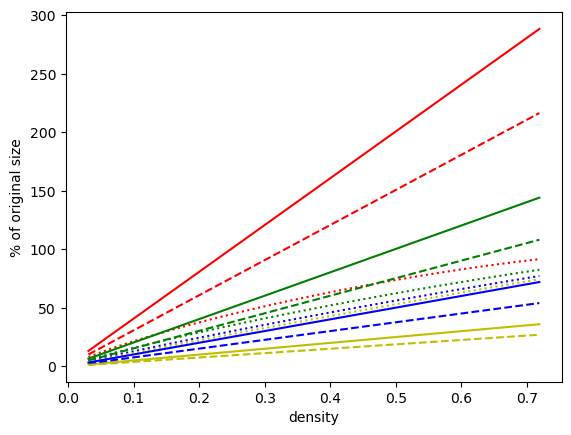

In [39]:
plt.plot(plotGrid, ansRatios[0], 'r:',
         plotGrid, ansRatios[1], 'g:',
         plotGrid, ansRatios[2], 'b:',
         plotGrid, ansRatios[3], 'y:')
plt.plot(plotGrid, absCsrRatios[0], 'r-', 
         plotGrid, absCsrRatios[1], 'g-',
         plotGrid, absCsrRatios[2], 'b-',
         plotGrid, absCsrRatios[3], 'y-')
plt.plot(plotGrid, RelativeCsrRatios[0], 'r--', 
         plotGrid, RelativeCsrRatios[1], 'g--',
         plotGrid, RelativeCsrRatios[2], 'b--',
         plotGrid, RelativeCsrRatios[3], 'y--')
plt.xlabel("density")
plt.ylabel("% of original size")
plt.show()